# **FRA501-HW1 Report**
Authors
- 64340500035 Napassorn Techasombooranakit
- 64340500049 Wasupol Hengsritawat

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -- |Authors' codes| --
import models.clustering as clustering
import models.regression as regression
import models.evaluation as evaluation

# **1. Clustering**

Given sample points

In [2]:
data_1 = {'x': [1, 3, 2, 8, 6, 7, -3, -2, -7],
          'y': [2, 3, 2, 8, 6, 7, -3, -4, -7]}
data_1 = pd.DataFrame(data_1,dtype=float)
data_1.head()

,x,y
0,1.0,2.0
1,3.0,3.0
2,2.0,2.0
3,8.0,8.0
4,6.0,6.0


### 1.1. If the starting points are (3,3), (2,2), and (-3,-3). Describe each assign and update step. What are the points assigned? What are the updated centroids?

Given centroids and the number of centroids,

In [3]:
K = 3

data_11 = data_1.copy()

centroid_11 = {'x': [3, 2, -3],
              'y': [3, 2, -3]}
centroid_11 = pd.DataFrame(centroid_11,dtype=float)
centroid_11.head()

,x,y
0,3.0,3.0
1,2.0,2.0
2,-3.0,-3.0


The results for the first assignment are shown below.

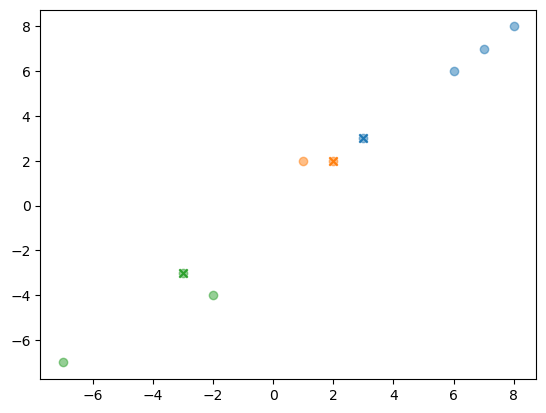

,x,y,labels
0,1.0,2.0,1
1,3.0,3.0,0
2,2.0,2.0,1
3,8.0,8.0,0
4,6.0,6.0,0


In [4]:
# -- |Assign Sample points to Centroid| --
for sp, i in zip(zip(data_11['x'],data_11['y']),range(data_11.shape[0])):
    sp_ct_dist = []
    # Calculate distance between sample point and centroids
    for ct in zip(centroid_11['x'],centroid_11['y']):
        sp_ct_dist.append(clustering.dist(sp,ct))
    # Assign sample point to the same label with the closest centroid
    data_11.at[i, 'labels'] = np.argmin(sp_ct_dist)
    
    plt.scatter(sp[0],sp[1],color = plt.rcParams['axes.prop_cycle'].by_key()['color'][np.argmin(sp_ct_dist)], alpha=0.5)

# -- |Assure that the labels will be integer| --
data_11['labels'] = data_11['labels'].astype(int)

# -- |Results Display| --
for ct, i in zip(zip(centroid_11['x'],centroid_11['y']), range(K)):
    plt.scatter(ct[0],ct[1], marker='x', color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i])

plt.show()
data_11.head()

Then, update centroid by computing the average of each cluster. This will be counted as 1st iteration.

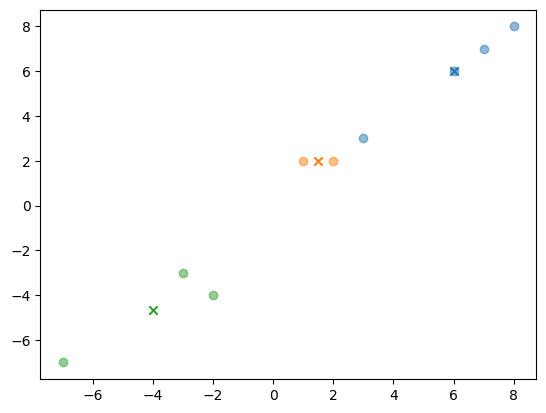

In [5]:
# -- |Centroid Update| --
for ct in range(K):
    centroid_11.at[ct, 'x'] = np.sum(data_11[data_11['labels'] == ct]['x'])/len(data_11[data_11['labels'] == ct]['x'])
    centroid_11.at[ct, 'y'] = np.sum(data_11[data_11['labels'] == ct]['y'])/len(data_11[data_11['labels'] == ct]['y'])

# -- |Results Display| --
for sp in zip(data_11['x'],data_11['y'],data_11['labels']):
    plt.scatter(sp[0],sp[1],color = plt.rcParams['axes.prop_cycle'].by_key()['color'][sp[2]], alpha=0.5)

for ct, i in zip(zip(centroid_11['x'],centroid_11['y']), range(K)):
    plt.scatter(ct[0],ct[1], marker='x', color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i])

plt.show()

Repeat assignment and update step until any update step does not change the centroid.

2nd iteration:

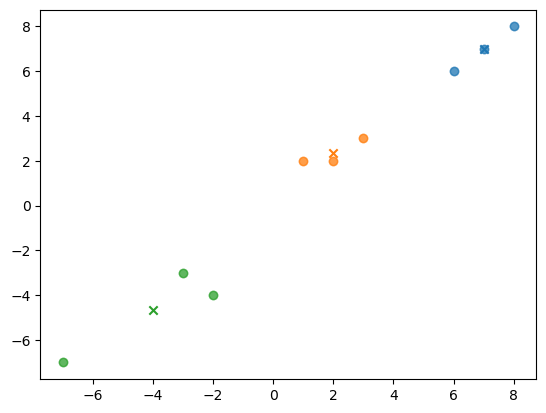

,x,y,labels
0,1.0,2.0,1
1,3.0,3.0,1
2,2.0,2.0,1
3,8.0,8.0,0
4,6.0,6.0,0


In [6]:
# -- |Assign Sample points to Centroid| --
for sp, i in zip(zip(data_11['x'],data_11['y']),range(data_11.shape[0])):
    sp_ct_dist = []
    # Calculate distance between sample point and centroids
    for ct in zip(centroid_11['x'],centroid_11['y']):
        sp_ct_dist.append(clustering.dist(sp,ct))
    # Assign sample point to the same label with the closest centroid
    data_11.at[i, 'labels'] = np.argmin(sp_ct_dist)
    
    plt.scatter(sp[0],sp[1],color = plt.rcParams['axes.prop_cycle'].by_key()['color'][np.argmin(sp_ct_dist)], alpha=0.5)

# -- |Assure that the labels will be integer| --
data_11['labels'] = data_11['labels'].astype(int)

# -- |Centroid Update| --
for ct in range(K):
    centroid_11.at[ct, 'x'] = np.sum(data_11[data_11['labels'] == ct]['x'])/len(data_11[data_11['labels'] == ct]['x'])
    centroid_11.at[ct, 'y'] = np.sum(data_11[data_11['labels'] == ct]['y'])/len(data_11[data_11['labels'] == ct]['y'])

# -- |Results Display| --
for sp in zip(data_11['x'],data_11['y'],data_11['labels']):
    plt.scatter(sp[0],sp[1],color = plt.rcParams['axes.prop_cycle'].by_key()['color'][sp[2]], alpha=0.5)

for ct, i in zip(zip(centroid_11['x'],centroid_11['y']), range(K)):
    plt.scatter(ct[0],ct[1], marker='x', color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i])

plt.show()
data_11.head()

3rd iteration:

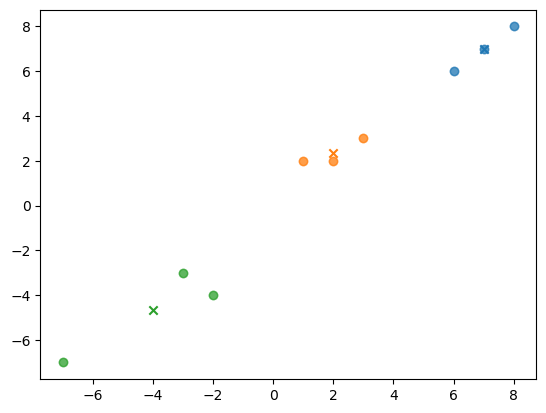

,x,y,labels
0,1.0,2.0,1
1,3.0,3.0,1
2,2.0,2.0,1
3,8.0,8.0,0
4,6.0,6.0,0


In [7]:
# -- |Assign Sample points to Centroid| --
for sp, i in zip(zip(data_11['x'],data_11['y']),range(data_11.shape[0])):
    sp_ct_dist = []
    # Calculate distance between sample point and centroids
    for ct in zip(centroid_11['x'],centroid_11['y']):
        sp_ct_dist.append(clustering.dist(sp,ct))
    # Assign sample point to the same label with the closest centroid
    data_11.at[i, 'labels'] = np.argmin(sp_ct_dist)
    
    plt.scatter(sp[0],sp[1],color = plt.rcParams['axes.prop_cycle'].by_key()['color'][np.argmin(sp_ct_dist)], alpha=0.5)

# -- |Assure that the labels will be integer| --
data_11['labels'] = data_11['labels'].astype(int)

# -- |Centroid Update| --
for ct in range(K):
    centroid_11.at[ct, 'x'] = np.sum(data_11[data_11['labels'] == ct]['x'])/len(data_11[data_11['labels'] == ct]['x'])
    centroid_11.at[ct, 'y'] = np.sum(data_11[data_11['labels'] == ct]['y'])/len(data_11[data_11['labels'] == ct]['y'])

# -- |Results Display| --
for sp in zip(data_11['x'],data_11['y'],data_11['labels']):
    plt.scatter(sp[0],sp[1],color = plt.rcParams['axes.prop_cycle'].by_key()['color'][sp[2]], alpha=0.5)

for ct, i in zip(zip(centroid_11['x'],centroid_11['y']), range(K)):
    plt.scatter(ct[0],ct[1], marker='x', color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i])

plt.show()
data_11.head()

Notice that, on the 3rd iteration, the position of centroids of each cluster remains the same as in the 2nd iteration. Thus, the result of clustering obtained since the 2nd iteration and be shown at the 2nd and 3rd iteration.

### 1.2. If the starting points are (-3,-3), (2,2), and (-7,-7), what happens?

Given centroids and the number of centroids,

In [8]:
K = 3

data_12 = data_1.copy()

centroid_12 = {'x': [-3, 2, -7],
               'y': [-3, 2, -7]}
centroid_12 = pd.DataFrame(centroid_12,dtype=float)
centroid_12.head()

,x,y
0,-3.0,-3.0
1,2.0,2.0
2,-7.0,-7.0


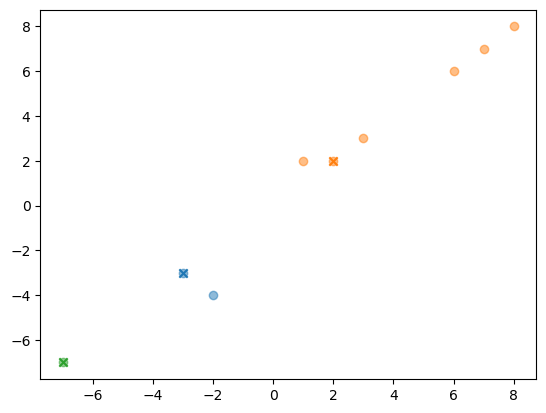

,x,y,labels
0,1.0,2.0,1
1,3.0,3.0,1
2,2.0,2.0,1
3,8.0,8.0,1
4,6.0,6.0,1


In [9]:
# -- |Assign Sample points to Centroid| --
for sp, i in zip(zip(data_12['x'],data_12['y']),range(data_12.shape[0])):
    sp_ct_dist = []
    # Calculate distance between sample point and centroids
    for ct in zip(centroid_12['x'],centroid_12['y']):
        sp_ct_dist.append(clustering.dist(sp,ct))
    # Assign sample point to the same label with the closest centroid
    data_12.at[i, 'labels'] = np.argmin(sp_ct_dist)
    
    plt.scatter(sp[0],sp[1],color = plt.rcParams['axes.prop_cycle'].by_key()['color'][np.argmin(sp_ct_dist)], alpha=0.5)

# -- |Assure that the labels will be integer| --
data_12['labels'] = data_12['labels'].astype(int)

# -- |Results Display| --
for ct, i in zip(zip(centroid_12['x'],centroid_12['y']), range(K)):
    plt.scatter(ct[0],ct[1], marker='x', color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i])

plt.show()
data_12.head()

1st update:

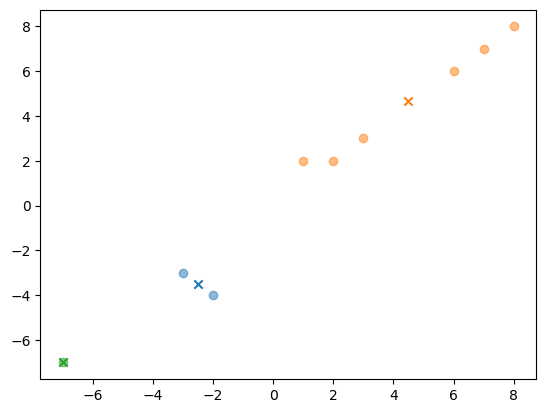

,x,y,labels
0,1.0,2.0,1
1,3.0,3.0,1
2,2.0,2.0,1
3,8.0,8.0,1
4,6.0,6.0,1


In [10]:
# -- |Centroid Update| --
for ct in range(K):
    centroid_12.at[ct, 'x'] = np.sum(data_12[data_12['labels'] == ct]['x'])/len(data_12[data_12['labels'] == ct]['x'])
    centroid_12.at[ct, 'y'] = np.sum(data_12[data_12['labels'] == ct]['y'])/len(data_12[data_12['labels'] == ct]['y'])

# -- |Results Display| --
for sp in zip(data_12['x'],data_12['y'],data_12['labels']):
    plt.scatter(sp[0],sp[1],color = plt.rcParams['axes.prop_cycle'].by_key()['color'][sp[2]], alpha=0.5)

for ct, i in zip(zip(centroid_12['x'],centroid_12['y']), range(K)):
    plt.scatter(ct[0],ct[1], marker='x', color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i])

plt.show()
data_12.head()

2nd iteration:

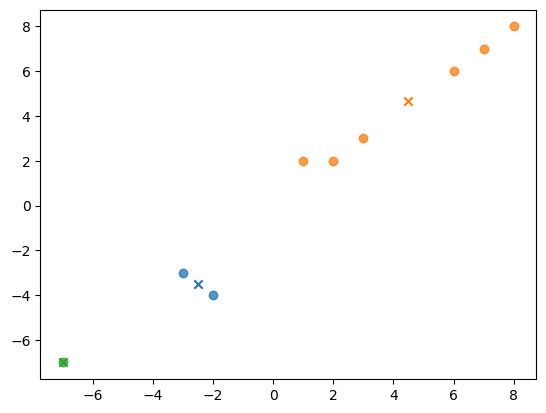

,x,y,labels
0,1.0,2.0,1
1,3.0,3.0,1
2,2.0,2.0,1
3,8.0,8.0,1
4,6.0,6.0,1


In [11]:
# -- |Assign Sample points to Centroid| --
for sp, i in zip(zip(data_12['x'],data_12['y']),range(data_12.shape[0])):
    sp_ct_dist = []
    # Calculate distance between sample point and centroids
    for ct in zip(centroid_12['x'],centroid_12['y']):
        sp_ct_dist.append(clustering.dist(sp,ct))
    # Assign sample point to the same label with the closest centroid
    data_12.at[i, 'labels'] = np.argmin(sp_ct_dist)
    
    plt.scatter(sp[0],sp[1],color = plt.rcParams['axes.prop_cycle'].by_key()['color'][np.argmin(sp_ct_dist)], alpha=0.5)

# -- |Assure that the labels will be integer| --
data_12['labels'] = data_12['labels'].astype(int)

# -- |Centroid Update| --
for ct in range(K):
    centroid_12.at[ct, 'x'] = np.sum(data_12[data_12['labels'] == ct]['x'])/len(data_12[data_12['labels'] == ct]['x'])
    centroid_12.at[ct, 'y'] = np.sum(data_12[data_12['labels'] == ct]['y'])/len(data_12[data_12['labels'] == ct]['y'])

# -- |Results Display| --
for sp in zip(data_12['x'],data_12['y'],data_12['labels']):
    plt.scatter(sp[0],sp[1],color = plt.rcParams['axes.prop_cycle'].by_key()['color'][sp[2]], alpha=0.5)

for ct, i in zip(zip(centroid_12['x'],centroid_12['y']), range(K)):
    plt.scatter(ct[0],ct[1], marker='x', color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i])

plt.show()
data_12.head()

The final results is shown on the second iteration since the centroid position from the second iteration remain the same as the first one. Compare to the results from 1.1 which has different initial centroid (starting point), these results are different. In this case, it is clearly that the green cluster is already on the local minima since next nearest sample point are already assigned to the blue cluster, so it won't update as the same as happened in 1.1. This suggest that the results of K-mean clustering are sensitive to the starting points, due to its will only converge to a local minimum. 

### 1.3. Between the two-starting set of points in the previous two questions, which one do you think is better? How would you measure the ‘goodness’ quality of a set of starting points?

Good clusters have to seperate the sample points in to groups efficiently. The characteristics of good clusters is given by
- Have small variance of sample points within classes
- Have big variance between classes (mostly will be represent as variances of class's centroids)


#### Method 1: Silhouette coefficient

In [12]:
print("1.1 starting points silhouette coefficient: ", clustering.silhouette(data_11,centroid_11))
print("1.2 starting points silhouette coefficient: ", clustering.silhouette(data_12,centroid_12))

1.1 starting points silhouette coefficient:  0.9245714285714286
1.2 starting points silhouette coefficient:  0.7713399706218378


Since the silhouette coefficient will be closed to 1 if the variance between classes is much larger than variance within classes, then it suggests that the starting points from 1.1 leads to the better results than the starting points from 1.2.

#### Method 2: Fraction of explained variance

In [13]:
print("1.1 starting points fraction of explained variance: ", clustering.FVE(data_11,centroid_11))
print("1.2 starting points fraction of explained variance: ", clustering.FVE(data_12,centroid_12))

1.1 starting points fraction of explained variance:  0.9298618490967058
1.2 starting points fraction of explained variance:  0.8138947927736452


The more the clusters can represent all data variance means the better clustering perform. Furthermore, the fraction of explained variance also proportional to the variance between classes. By comparing the fractions of explained variances, the result also suggested that the clusters from 1.1 are better the clusters from 1.2.

### 1.4.  What would be the best K for this question? Describe your reasoning.

Evaluating silhoette coefficients and fraction of explained variance as K is increasing from 2.

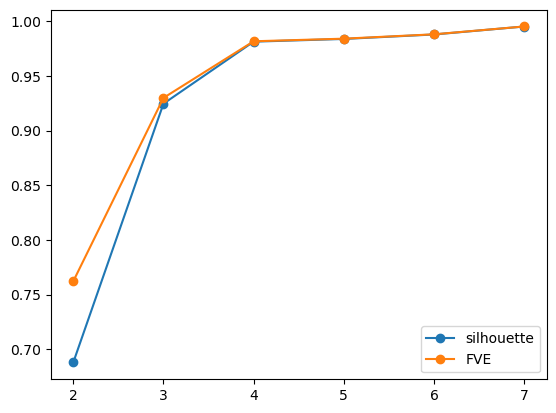

In [14]:
data_14 = data_1.copy()

sil = []
fve = []
K_max = 8 # Maximum swept K

for K in range(2,K_max):
    data_14, centroid_14 = clustering.kmean(data_14, K)
    sil.append(clustering.silhouette(data_14, centroid_14))
    fve.append(clustering.FVE(data_14, centroid_14))

plt.plot(range(2,K_max), sil, '-o', label='silhouette')
plt.plot(range(2,K_max), fve, '-o', label='FVE')
plt.legend(loc="lower right")

plt.show()

By computing silhouette coefficients and and fraction of explained variance, the best K is K = 4 since increase the model complexity to K = 5 or more does not yield much better performance. Moreover, K = 4 also the minimized K which can explained at least 95% of variance.

# **2. Regression**

Given train and test data about passengers on the Titanic.

In [15]:
data_2_train = pd.read_csv('train.csv')
data_2_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
data_2_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Let's assume our goal is to predict whether a passenger will survive or not. Then, the training data consists of 890 instances with 11 attributes and 1 label. Attributes can be divided into categories according to their type:
* Categorical attributes: PassengerId, Pclass (Ticket class), Name, Sex, Ticket, Cabin, and Embarked (Port of embarkation)
* Numerical attributes: Age, SibSp (# of siblings / spouses aboard the Titanic), Parch (# of parents / children aboard the Titanic), and Fare

The label is "survived," which is a categorical label. "Survived" equals 0 and 1, meaning the passenger is dead or survived, respectively.

In [17]:
data_2_test = pd.read_csv('test.csv')
data_2_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
data_2_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


Similarly, the test data consists of 11 attributes but for only 417 instances. Note that the label is missing because we have to predict it ourselves in subsequent exercises. Additionally, both the train and test data appear to contain some missing values.

Let's explore train data further by observe it statistical characteristics by using describe().

In [19]:
data_2_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


About 177 instances are missing their age attributes, this will be cope in the next exercise by setting the missing values in age attribute with it's median of 28 (median is the spatially middle of sorted value which represent as 50% in this table). PassengerId appears to have a large std, this is expected since passenger ID is unique for each instance.

### 2.1. What is the median age of the training set?

The missing value can be replace either median or mode of the data for the reason that they don't change (or changed but just slightly) the overall characteristics of data such as themselves and mean. Since the median of age in training set is 28, the missing data is replaced by

In [20]:
data_2_train['Age'] = data_2_train['Age'].fillna(data_2_train['Age'].median())

Let's take a look at the statistical characteristics of data again.

In [21]:
data_2_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Now, the missing value in age is handled. The statistical characteristics also do not changed much by replacing missing values with median.

### 2.2. Some fields like ‘Embarked’ are categorical. They need to be converted to numbers first. We will represent S with 0, C with 1, and Q with 2. What is the mode of Embarked? Fill the missing values with the mode.

First, change the categorical attribute which is not converted to numbers yet to numbers. In addition, for sex attribute, we will represent male with 0 and female with 1. Note that the attributes "Name", "Ticket", and "Cabin" are not be used since they are unique for each instant.

In [22]:
data_2_train['Embarked'] = data_2_train['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2])
data_2_train['Sex'] = data_2_train['Sex'].replace(['male', 'female'], [0, 1])

To ensure that both of these attributes are usable and not almost covered with missing values, the number of missing values must be observed.

In [23]:
print('# of missing values in Embarked: ', data_2_train['Embarked'].isna().sum())
print('# of missing values in Sex     : ', data_2_train['Sex'].isna().sum())

# of missing values in Embarked:  2
# of missing values in Sex     :  0


Missing values appeared only in the sex attribute. Then, fill all the missing values with the mode.

In [24]:
data_2_train['Embarked'] = data_2_train['Embarked'].fillna(data_2_train['Embarked'].mode()[0])

### 2.3. Write a logistic regression classifier using gradient descent (from scratch, don’t use scikit-learn framework or others) as learned in class (Survived). Use PClass, Sex, Age, and Embarked as input features.

To develop a logistic regression classifier from scratch, begin with extract usable features and label to numpy.ndarray. The data all so be splitted into train and validate set to evaluate the model performance for unseen data.

In [25]:
data_23_train_x = np.array(data_2_train[["Pclass","Sex","Age","Embarked"]].iloc[0:588].values, dtype =float)
data_23_train_y = np.array(data_2_train[["Survived"]].iloc[0:588].values, dtype =int)
print(data_23_train_x)
print(len(data_23_train_y))

[[ 3.  0. 22.  0.]
 [ 1.  1. 38.  1.]
 [ 3.  1. 26.  0.]
 ...
 [ 1.  1. 18.  0.]
 [ 2.  0. 47.  0.]
 [ 1.  0. 60.  1.]]
588


In [26]:
data_23_validate_x = np.array(data_2_train[["Pclass","Sex","Age","Embarked"]].iloc[588:].values, dtype =float)
data_23_validate_y = np.array(data_2_train[["Survived"]].iloc[588:].values, dtype =int)
print(data_23_validate_x)
print(len(data_23_validate_y))

[[ 3.  0. 22.  0.]
 [ 3.  0. 28.  0.]
 [ 3.  0. 35.  0.]
 ...
 [ 3.  1. 28.  0.]
 [ 1.  0. 26.  1.]
 [ 3.  0. 32.  2.]]
303


The model algorithm is locate on the model.regression. Then, train model using the wrote algorithm with train data.

In [27]:
theta_23, cross_entropy_23 = regression.logistic_fit(data_23_train_x, data_23_train_y, 0.0025, 0.00000001)

# -- |Display| --
print('Model: ' + regression.logistic_display(theta_23))
print('Natural based binary cross entropy =',cross_entropy_23[-1])

Model: y = sigmoid(1.203944 - 0.923963x_1 + 2.597347x_2 - 0.025303x_3 + 0.321728x_4)
Natural based binary cross entropy = 0.4639066925156284


In addition to the model and loss, the loss over iterations is plotted below. The figure demonstrates that gradient descent decreases the loss over iterations and it converges to its minimum.

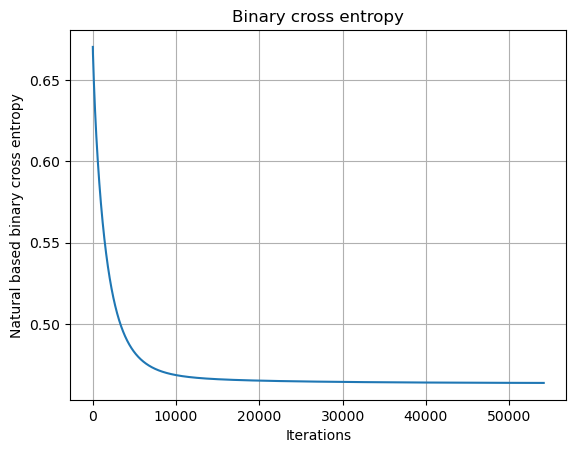

In [28]:
plt.plot(cross_entropy_23)
plt.title('Binary cross entropy')
plt.ylabel('Natural based binary cross entropy')
plt.xlabel('Iterations')
plt.grid(True)

### 2.4. When you evaluate the trained model on the test set, you will need to make a final decision. Since logistic regression outputs a score between 0 and 1, you will need to decide whether a score of 0.3 (or any other number) means the passenger survive or not. For now, we will say if the score is greater than or equal to 0.5, the passenger survives. If the score is lower than 0.5 the passenger will be dead. This process is often called ‘Thresholding.’ Then, show your precision, recall, f1-score on the training set and test set. 

When plotting between a threshold ranging from 0 to 1 against the values of accuracy, precision, recall, and F1 score of the model, as shown in the graph below, it can be observed that the threshold value that does not excessively increase or decrease the accuracy, precision, recall, and F1 score (all approximately equal) is around 4.7

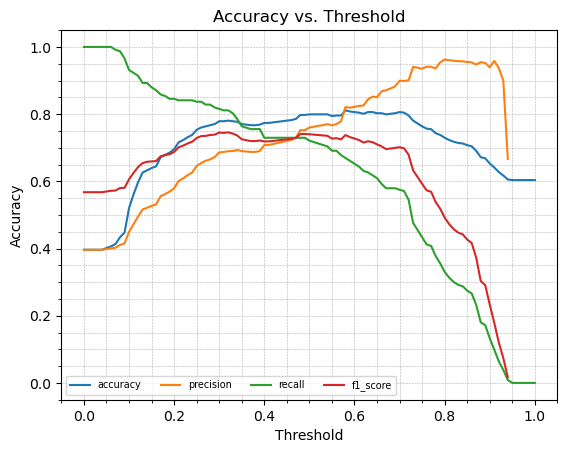

In [29]:
accuracy = []
precision = []
recall = []
f1_score = []

thresholds = np.arange(0, 1.01, 0.01)  # Vary threshold from 0 to 1 in steps of 0.01

for threshold in thresholds:
    data_23_train_accuracy, data_23_train_precision, data_23_train_recall, data_23_train_f1 = evaluation.classification_report(data_23_train_y, regression.logistic_transform(data_23_train_x, theta_23, threshold))
    accuracy.append(round(data_23_train_accuracy, 4))
    precision.append(round(data_23_train_precision, 4))
    recall.append(round(data_23_train_recall, 4))
    f1_score.append(round(data_23_train_f1, 4))
    

plt.plot(thresholds, accuracy, label="accuracy") 
plt.plot(thresholds, precision, label="precision")
plt.plot(thresholds, recall, label="recall")
plt.plot(thresholds, f1_score, label="f1_score")
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', linewidth=0.4, which='both')
plt.minorticks_on()
plt.grid(True, linestyle='--', linewidth=0.4, which='minor')
plt.title('Accuracy vs. Threshold')
leg = plt.legend(loc='lower left', fontsize=7, ncol=4)
plt.show()

Threhold the results from the logistic model with 0.5. The confusion matrix, accuracy, precision, recall, and F1-score of train and validation set is shown below.

In [30]:
data_23_train_accuracy, data_23_train_precision, data_23_train_recall, data_23_train_f1 = evaluation.classification_report(data_23_train_y, regression.logistic_transform(data_23_train_x, theta_23, 0.5),"Matrix")

print(regression.logistic_transform(data_23_train_x, theta_23, 0.5))


Confusion Matrix
----------------------------------
|            |     Predicted     |
|            ---------------------   Accuracy  = 0.7993197278911565
|            |    P    |    N    |
----------------------------------   Precision = 0.7601809954751131
|        | P |   168   |   65    |   Recall    = 0.721030042918455
| Actual -------------------------
|        | N |   53    |   302   |   F1-score  = 0.7400881057268723
----------------------------------
[[0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [

In [31]:
data_23_validate_accuracy, data_23_validate_precision, data_23_validate_recall, data_23_validate_f1 = evaluation.classification_report(data_23_validate_y, regression.logistic_transform(data_23_validate_x, theta_23, 0.5),"Matrix")

Confusion Matrix
----------------------------------
|            |     Predicted     |
|            ---------------------   Accuracy  = 0.7920792079207921
|            |    P    |    N    |
----------------------------------   Precision = 0.75
|        | P |   69    |   40    |   Recall    = 0.6330275229357798
| Actual -------------------------
|        | N |   23    |   171   |   F1-score  = 0.6865671641791045
----------------------------------


### 2.5. Try adding some higher order features to your training e.g. (x1^2,x1,x2,...). Does this model have better accuracy on the training set? How does it perform on the test set?

Let's create another data set with have square of age as additional feature.

In [32]:
data_25_train_x = np.array(data_2_train[["Pclass","Sex","Age","Embarked"]].iloc[0:588].values, dtype =float)
data_25_train_y = np.array(data_2_train[["Survived"]].iloc[0:588].values, dtype =int)

data_25_train_x = np.insert(data_25_train_x, 3, (data_25_train_x[:,2])**2, axis=1)
print(data_25_train_x)

[[3.000e+00 0.000e+00 2.200e+01 4.840e+02 0.000e+00]
 [1.000e+00 1.000e+00 3.800e+01 1.444e+03 1.000e+00]
 [3.000e+00 1.000e+00 2.600e+01 6.760e+02 0.000e+00]
 ...
 [1.000e+00 1.000e+00 1.800e+01 3.240e+02 0.000e+00]
 [2.000e+00 0.000e+00 4.700e+01 2.209e+03 0.000e+00]
 [1.000e+00 0.000e+00 6.000e+01 3.600e+03 1.000e+00]]


In [33]:
data_25_validate_x = np.array(data_2_train[["Pclass","Sex","Age","Embarked"]].iloc[588:].values, dtype =float)
data_25_validate_y = np.array(data_2_train[["Survived"]].iloc[588:].values, dtype =int)

data_25_validate_x = np.insert(data_25_validate_x, 3, (data_25_validate_x[:,2])**2, axis=1)
print(data_25_validate_x)

[[3.000e+00 0.000e+00 2.200e+01 4.840e+02 0.000e+00]
 [3.000e+00 0.000e+00 2.800e+01 7.840e+02 0.000e+00]
 [3.000e+00 0.000e+00 3.500e+01 1.225e+03 0.000e+00]
 ...
 [3.000e+00 1.000e+00 2.800e+01 7.840e+02 0.000e+00]
 [1.000e+00 0.000e+00 2.600e+01 6.760e+02 1.000e+00]
 [3.000e+00 0.000e+00 3.200e+01 1.024e+03 2.000e+00]]


Then, train the model using modified train data set.

In [34]:
theta_25, cross_entropy_25 = regression.logistic_fit(data_25_train_x, data_25_train_y,  0.00000025, 0.0000000001)

# -- |Display| --
print('Model: ' + regression.logistic_display(theta_25))
print('Natural based binary cross entropy =',cross_entropy_25[-1])

KeyboardInterrupt: 

Notice that the training process takes significant longer time to converged to the minimum loss than using original train data set (about 100,000,000 iterations).

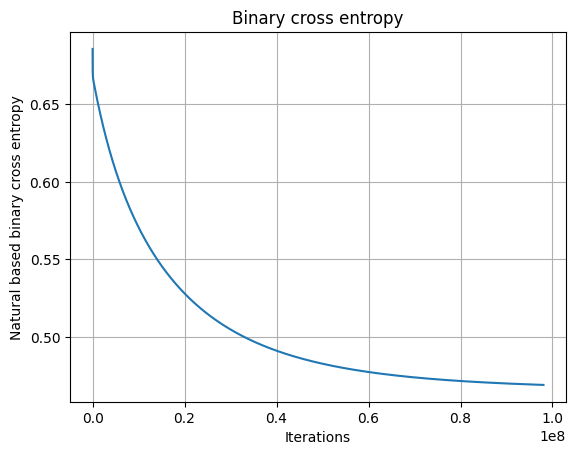

In [ ]:
plt.plot(cross_entropy_25)
plt.title('Binary cross entropy')
plt.ylabel('Natural based binary cross entropy')
plt.xlabel('Iterations')
plt.grid(True)

When plotting between thresholds from 0 to 1 against the accuracy, precision, recall, and F1 score values of the model, it can be observed that employing higher-order features doesn't significantly differ from not employing higher-order features much. This can be seen as both accuracy, precision, recall, and F1 score of the model exhibit characteristics that are quite similar to using normal features.

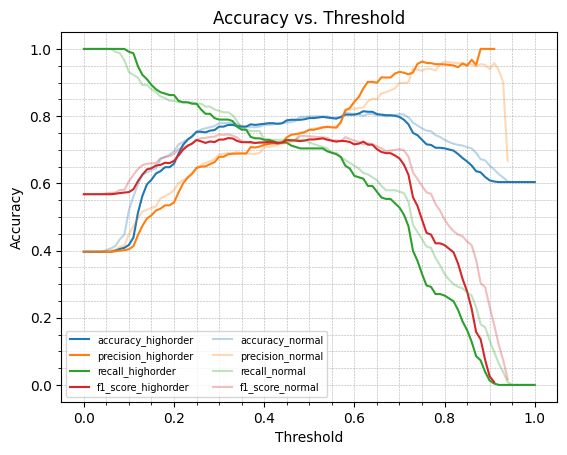

In [ ]:
accuracy_high = []
precision_high = []
recall_high = []
f1_score_high = []

thresholds = np.arange(0, 1.01, 0.01)  # Vary threshold from 0 to 1 in steps of 0.01

for threshold in thresholds:
    data_25_train_accuracy, data_25_train_precision, data_25_train_recall, data_25_train_f1 = evaluation.classification_report(data_25_train_y, regression.logistic_transform(data_25_train_x, theta_25, threshold))
    accuracy_high.append(round(data_25_train_accuracy, 4))
    precision_high.append(round(data_25_train_precision, 4))
    recall_high.append(round(data_25_train_recall, 4))
    f1_score_high.append(round(data_25_train_f1, 4))
    

line1, = plt.plot(thresholds, accuracy_high, label="accuracy_highorder") 
line2, = plt.plot(thresholds, precision_high, label="precision_highorder")
line3, = plt.plot(thresholds, recall_high, label="recall_highorder")
line4, = plt.plot(thresholds, f1_score_high, label="f1_score_highorder")

plt.plot(thresholds, accuracy, label="accuracy_normal", color=line1.get_color(), alpha=0.3) 
plt.plot(thresholds, precision, label="precision_normal", color=line2.get_color(), alpha=0.3) 
plt.plot(thresholds, recall, label="recall_normal", color=line3.get_color(), alpha=0.3) 
plt.plot(thresholds, f1_score, label="f1_score_normal", color=line4.get_color(), alpha=0.3) 

plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', linewidth=0.4, which='both')
plt.minorticks_on()
plt.grid(True, linestyle='--', linewidth=0.4, which='minor')
plt.title('Accuracy vs. Threshold')
leg = plt.legend(loc='lower left', fontsize=7, ncol=2)
plt.show()

The classification results from thresholding are shown below.

In [ ]:
data_25_train_accuracy, data_25_train_precision, data_25_train_recall, data_25_train_f1 = evaluation.classification_report(data_25_train_y, regression.logistic_transform(data_25_train_x, theta_25, 0.5),"Matrix")

Confusion Matrix
----------------------------------
|            |     Predicted     |
|            ---------------------   Accuracy  = 0.79421768707483
|            |    P    |    N    |
----------------------------------   Precision = 0.7592592592592593
|        | P |   164   |   69    |   Recall    = 0.703862660944206
| Actual -------------------------
|        | N |   52    |   303   |   F1-score  = 0.7305122494432071
----------------------------------


In [ ]:
data_25_validate_accuracy, data_25_validate_precision, data_25_validate_recall, data_25_validate_f1 = evaluation.classification_report(data_25_validate_y, regression.logistic_transform(data_25_validate_x, theta_25, 0.5),"Matrix")

Confusion Matrix
----------------------------------
|            |     Predicted     |
|            ---------------------   Accuracy  = 0.7821782178217822
|            |    P    |    N    |
----------------------------------   Precision = 0.7311827956989247
|        | P |   68    |   41    |   Recall    = 0.6238532110091743
| Actual -------------------------
|        | N |   25    |   169   |   F1-score  = 0.6732673267326733
----------------------------------


The results did not show a significant difference compared to the training dataset that did not include the square of ages as a feature, yet it took significantly longer to converge to the minimum loss. This suggests that in this case, the additional feature is trivial because it adds more complexity to the model without enhancing performance. It's important to note that if higher-order features have linear relationships with the target classes, the results may be better than those achieved using the original features. 

### 2.6. What happens if you reduce the number of features to just Sex and Age?

Create new data sets contain only sex and age features.

In [ ]:
data_26_train_x = np.array(data_2_train[["Sex","Age"]].iloc[0:588].values, dtype =float)
data_26_train_y = np.array(data_2_train[["Survived"]].iloc[0:588].values, dtype =int)

print(data_26_train_x)

[[ 0. 22.]
 [ 1. 38.]
 [ 1. 26.]
 ...
 [ 1. 18.]
 [ 0. 47.]
 [ 0. 60.]]


In [ ]:
data_26_validate_x = np.array(data_2_train[["Sex","Age"]].iloc[588:].values, dtype =float)
data_26_validate_y = np.array(data_2_train[["Survived"]].iloc[588:].values, dtype =int)

print(data_26_validate_x)

[[ 0.   22.  ]
 [ 0.   28.  ]
 [ 0.   35.  ]
 [ 1.   52.  ]
 [ 0.   47.  ]
 [ 1.   28.  ]
 [ 0.   37.  ]
 [ 0.   36.  ]
 [ 1.   28.  ]
 [ 0.   49.  ]
 [ 0.   28.  ]
 [ 0.   49.  ]
 [ 1.   24.  ]
 [ 0.   28.  ]
 [ 0.   28.  ]
 [ 0.   44.  ]
 [ 0.   35.  ]
 [ 0.   36.  ]
 [ 0.   30.  ]
 [ 0.   27.  ]
 [ 1.   22.  ]
 [ 1.   40.  ]
 [ 1.   39.  ]
 [ 0.   28.  ]
 [ 1.   28.  ]
 [ 0.   28.  ]
 [ 0.   35.  ]
 [ 1.   24.  ]
 [ 0.   34.  ]
 [ 1.   26.  ]
 [ 1.    4.  ]
 [ 0.   26.  ]
 [ 0.   27.  ]
 [ 0.   42.  ]
 [ 0.   20.  ]
 [ 0.   21.  ]
 [ 0.   21.  ]
 [ 0.   61.  ]
 [ 0.   57.  ]
 [ 1.   21.  ]
 [ 0.   26.  ]
 [ 0.   28.  ]
 [ 0.   80.  ]
 [ 0.   51.  ]
 [ 0.   32.  ]
 [ 0.   28.  ]
 [ 1.    9.  ]
 [ 1.   28.  ]
 [ 0.   32.  ]
 [ 0.   31.  ]
 [ 1.   41.  ]
 [ 0.   28.  ]
 [ 0.   20.  ]
 [ 1.   24.  ]
 [ 1.    2.  ]
 [ 0.   28.  ]
 [ 1.    0.75]
 [ 0.   48.  ]
 [ 0.   19.  ]
 [ 0.   56.  ]
 [ 0.   28.  ]
 [ 1.   23.  ]
 [ 0.   28.  ]
 [ 1.   18.  ]
 [ 0.   21.  ]
 [ 1.   28.  ]
 [ 1.   18

Train the models using created train data set.

In [ ]:
theta_26, cross_entropy_26 = regression.logistic_fit(data_26_train_x, data_26_train_y, 0.0025, 0.000000001)

# -- |Display| --
print('Model: ' + regression.logistic_display(theta_26))
print('Natural based binary cross entropy =',cross_entropy_26[-1])

Model: y = sigmoid(-1.318596 + 2.563486x_1 - 0.005333x_2)
Natural based binary cross entropy = 0.509594188595997


The fewer features inputted into the model, the less time it takes for the loss to converge to its minimum.

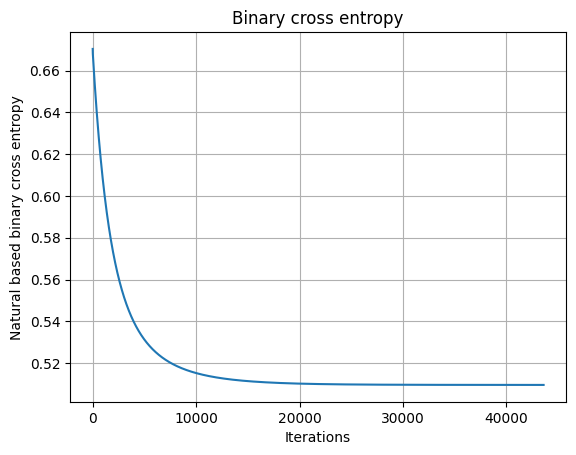

In [ ]:
plt.plot(cross_entropy_26)
plt.title('Binary cross entropy')
plt.ylabel('Natural based binary cross entropy')
plt.xlabel('Iterations')
plt.grid(True)

When plotting between thresholds from 0 to 1 against the accuracy, precision, recall, and F1 score values of the model, it can be observed that reducing to 2 features makes the model more confident about predicting whether it belongs to class 1 or 0 (no predict within the range of 0.2 to 0.7.) Consequently, when thresholds are cut between 0.2 to 0.7, it results in similar accuracy, precision, recall, and F1 score values. This is markedly different from when using 4 features.

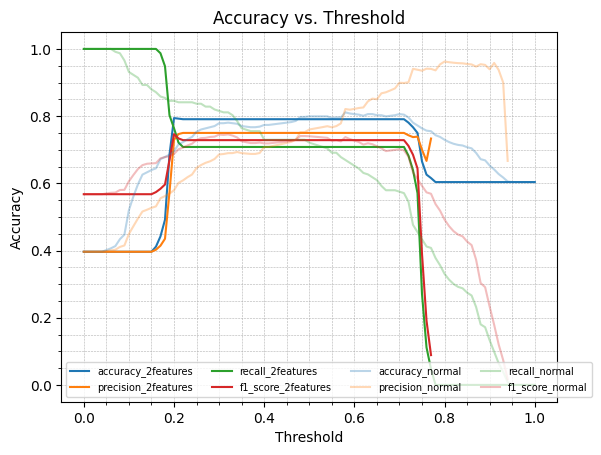

In [ ]:
accuracy_2f = []
precision_2f = []
recall_2f = []
f1_score_2f = []

thresholds = np.arange(0, 1.01, 0.01)  # Vary threshold from 0 to 1 in steps of 0.01

for threshold in thresholds:
    data_26_train_accuracy, data_26_train_precision, data_26_train_recall, data_26_train_f1 = evaluation.classification_report(data_26_train_y, regression.logistic_transform(data_26_train_x, theta_26, threshold))
    accuracy_2f.append(round(data_26_train_accuracy, 4))
    precision_2f.append(round(data_26_train_precision, 4))
    recall_2f.append(round(data_26_train_recall, 4))
    f1_score_2f.append(round(data_26_train_f1, 4))
    

line1, = plt.plot(thresholds, accuracy_2f, label="accuracy_2features") 
line2, = plt.plot(thresholds, precision_2f, label="precision_2features")
line3, = plt.plot(thresholds, recall_2f, label="recall_2features")
line4, = plt.plot(thresholds, f1_score_2f, label="f1_score_2features")

plt.plot(thresholds, accuracy, label="accuracy_normal", color=line1.get_color(), alpha=0.3) 
plt.plot(thresholds, precision, label="precision_normal", color=line2.get_color(), alpha=0.3) 
plt.plot(thresholds, recall, label="recall_normal", color=line3.get_color(), alpha=0.3) 
plt.plot(thresholds, f1_score, label="f1_score_normal", color=line4.get_color(), alpha=0.3) 

plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', linewidth=0.4, which='both')
plt.minorticks_on()
plt.grid(True, linestyle='--', linewidth=0.4, which='minor')
plt.title('Accuracy vs. Threshold')
leg = plt.legend(loc='lower left', fontsize=7, ncol=4)
plt.show()

The classification results from thresholding are shown below.

In [ ]:
data_26_train_accuracy, data_26_train_precision, data_26_train_recall, data_26_train_f1 = evaluation.classification_report(data_26_train_y, regression.logistic_transform(data_26_train_x, theta_26, 0.5),"Matrix")

Confusion Matrix
----------------------------------
|            |     Predicted     |
|            ---------------------   Accuracy  = 0.7908163265306123
|            |    P    |    N    |
----------------------------------   Precision = 0.75
|        | P |   165   |   68    |   Recall    = 0.7081545064377682
| Actual -------------------------
|        | N |   55    |   300   |   F1-score  = 0.728476821192053
----------------------------------


In [ ]:
data_26_validate_accuracy, data_26_validate_precision, data_26_validate_recall, data_26_validate_f1 = evaluation.classification_report(data_26_validate_y, regression.logistic_transform(data_26_validate_x, theta_26, 0.5),"Matrix")

Confusion Matrix
----------------------------------
|            |     Predicted     |
|            ---------------------   Accuracy  = 0.7788778877887789
|            |    P    |    N    |
----------------------------------   Precision = 0.723404255319149
|        | P |   68    |   41    |   Recall    = 0.6238532110091743
| Actual -------------------------
|        | N |   26    |   168   |   F1-score  = 0.6699507389162561
----------------------------------


The results don't show any significant difference from the original dataset, but the training process is significantly faster than with the original model. Reducing the features to only 2, which are sex and age, increases the model's confidence in making predictions. This can be observed from the graphs comparing thresholds with accuracy, precision, recall, and F1 score. Having 4 features leads to greater confusion in the model's predictions. The simpler model suggests that only sex and age can be used to determine whether a passenger will survive or not. This also reflects the historical fact that females and children were prioritized for rescue during the Titanic disaster.

### 2.7. We want to show that matrix inversion yields the same answer as the gradient descent method. However, there is no closed form solution for logistic regression. Thus, we will use normal linear regression instead. Re-do the Titanic task as a regression problem by using linear regression. Use the gradient descent method. Then, show your weights and loss values of training set and test set (Mean Squared Errors (MSE)). 


Train the model using the original 4 features data set from 2.3 using gradient descent linear regression.

In [ ]:
theta_27_gd, cross_entropy_27_gd = regression.linear_fit(data_23_train_x, data_23_train_y, 0.00025, 0.00000000001)

# -- |Display| --
print('Model: ' + regression.linear_display(theta_27_gd))
print('MSE of train set =',cross_entropy_27_gd[-1])

Model: y = 0.668631 - 0.154537x_1 + 0.515480x_2 - 0.004382x_3 + 0.050804x_4
MSE of train set = 0.14927766152738556


Similar to logistic regression, gradient descent decreases the prediction loss over iterations. The prediction loss converged to its minimum by the 100,000th iteration.

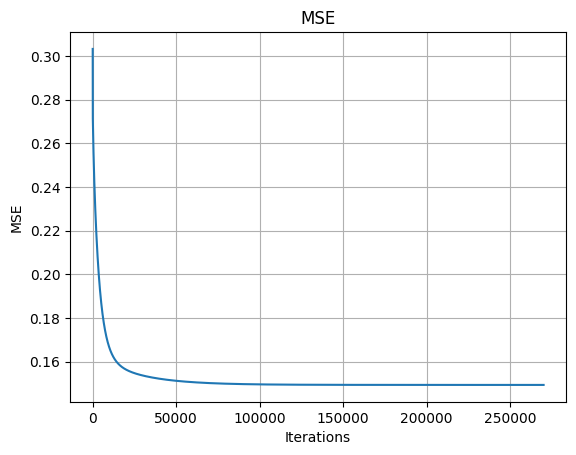

In [ ]:
plt.plot(cross_entropy_27_gd)
plt.title('MSE')
plt.ylabel('MSE')
plt.xlabel('Iterations')
plt.grid(True)

The MSE of unseen validation set is shown below.

In [ ]:
print("MSE of validation set = ", evaluation.MSE(data_23_validate_y,regression.linear_transform(data_23_validate_x,theta_27_gd)))

MSE of validation set =  0.13868984964735578


It is noted that the MSE of the validation set is smaller than that of the training set. This situation can occur if the validation set contains instances with features that have a more linear relationship with the labels, making them easier to predict, compared to those in the training set. Additionally, if the training set contains outliers or cases that are difficult to predict, this could also lead to such a scenario.

### 2.8. Now try using matrix inversion instead. However, are the weights learned from the two methods similar? Report the Mean Squared Errors (MSE) of the difference between the two weights (2.7 and 2.8).


Train the model using the original 4 features data set from 2.3 using matrix inversion linear regression.

In [ ]:
theta_27_mi, cross_entropy_27_mi = regression.matrix_linear_fit(data_23_train_x, data_23_train_y)

# -- |Display| --
print('Model: ' + regression.linear_display(theta_27_mi))
print('Natural based binary cross entropy =',cross_entropy_27_mi)

Model: y = 0.670998 - 0.155072x_1 + 0.515081x_2 - 0.004412x_3 + 0.050776x_4
Natural based binary cross entropy = 0.1492774155499177


The MSE of unseen validation set is shown below.

In [ ]:
print("MSE of validation set = ", evaluation.MSE(data_23_validate_y,regression.linear_transform(data_23_validate_x,theta_27_mi)))

MSE of validation set =  0.13862349358656675


The MSE of the model solved by matrix inversion is slightly better than that of the model solved by gradient descent. This is because the parameters obtained from matrix inversion represent the actual minimum of the loss, whereas gradient descent can only approximate the parameters that converge the loss to its minimum.

The difference between the two models is reported below.

In [ ]:
print('Model from gradient descent : ' + regression.linear_display(theta_27_gd))
print('Model from matrix inversion : ' + regression.linear_display(theta_27_mi))
print('MSE of the different between 2 weights = ',np.sum((theta_27_gd - theta_27_mi)**2)/theta_27_gd.shape[0])

Model from gradient descent : y = 0.668631 - 0.154537x_1 + 0.515480x_2 - 0.004382x_3 + 0.050804x_4
Model from matrix inversion : y = 0.670998 - 0.155072x_1 + 0.515081x_2 - 0.004412x_3 + 0.050776x_4
MSE of the different between 2 weights =  1.2101695983457636e-06


The models obtained from both gradient descent and matrix inversion are very similar. The MSE is also very small compared to the weights themselves. This suggests that both techniques can effectively be used to solve for linear regression parameters.

## Test Results

Let's observed if test set have any missing values.

In [ ]:
data_2_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Test set usable features are not appeared to have any missing values. Then, converged the categorical features to numbers and replace their missing values with train set mode.

In [ ]:
# -- |Convert to number| --
data_2_test['Embarked'] = data_2_test['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2])
data_2_test['Sex'] = data_2_test['Sex'].replace(['male', 'female'], [0, 1])

# -- |Replace missing values with mode of trainset| --
data_2_test['Embarked'] = data_2_test['Embarked'].fillna(data_2_train['Embarked'].mode()[0])
data_2_test['Sex'] = data_2_test['Sex'].fillna(data_2_train['Sex'].mode()[0])

Since the results from section 2.3 give the best results, the features "Pclass","Sex","Age", and "Embarked" are selected.

In [ ]:
data_2_test_x = np.array(data_2_test[["Pclass","Sex","Age","Embarked"]].values, dtype =float)
print(data_2_test_x)

[[ 3.   0.  34.5  2. ]
 [ 3.   1.  47.   0. ]
 [ 2.   0.  62.   2. ]
 ...
 [ 3.   0.  38.5  0. ]
 [ 3.   0.   nan  0. ]
 [ 3.   0.   nan  1. ]]


The prediction results for the test set, using the model from section 2.3, are shown below.

In [ ]:
prediction = regression.logistic_transform(data_2_test_x, theta_23, 0.5)
print(prediction)

[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
